In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.sklearn

import gensim
import gensim.corpora as corpora

from gensim.models import CoherenceModel, ldamodel

from topic_modeler import TopicModeler

/Users/mdinauta/v-envs/tip/lib/python3.8/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


# Model Search

## Begin with a small corpus, and unigrams

In [15]:
mod = TopicModeler('preprocessed_input/preprocessed_input_10k_unigrams.json')
mod.set_texts()
mod.set_dictionary()
mod.set_corpus()

start = 2; stop = 40; step = 6
model_list, coherence_values = mod.optimal_model_search(start, stop, step)

## Model search results (unigrams)

The optimal coherence looks like it is converging to a single topic. The interpretation is that the models are generally not successful at seperating the corpus into distinct topics.

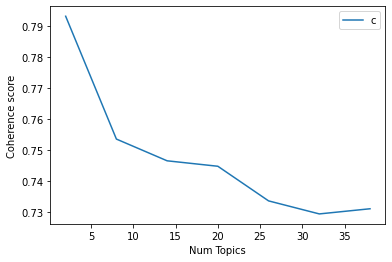

[0.7930751209140563,
 0.7534569294204042,
 0.74644497483061,
 0.7446870649637086,
 0.7335170620553628,
 0.7293149250486016,
 0.7309779043856991]

In [16]:
mod.plot_model_search_results(coherence_values, start, stop, step)
coherence_values

## Compare to ngrams (small dataset)

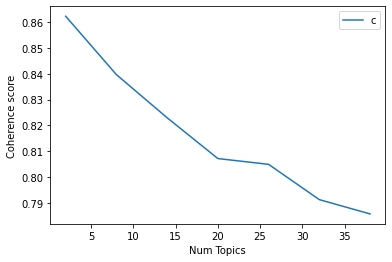

[0.8623058866364632,
 0.8396669912286201,
 0.8229507564822243,
 0.807130896741838,
 0.8048838732545202,
 0.791201869857301,
 0.7856638463170078]

In [17]:
mod = TopicModeler('preprocessed_input/preprocessed_input_10k_ngrams.json')
mod.set_texts()
mod.set_dictionary()
mod.set_corpus()

model_list, coherence_values = mod.optimal_model_search(start,stop,step)

mod.plot_model_search_results(coherence_values, start, stop, step)
coherence_values

Overall, coherence is improved when switching from unigrams to bigrams/trigrams. We'll stick with bigrams/trigrams for the remainder of the analysis.

## Fit the model on a larger corpus

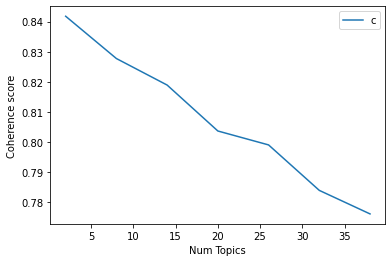

In [21]:
mod = TopicModeler('preprocessed_input/preprocessed_input_100k_ngrams.json')
mod.set_texts()
mod.set_dictionary()
mod.set_corpus()

start = 2; stop=40; step=6

model_list, coherence_values = mod.optimal_model_search(start,stop,step)
mod.plot_model_search_results(coherence_values, start, stop, step)

# Explore selected model in detail

In [22]:
mod.set_optimal_model(model_list, 1)
sent_topics_df, doc_topic_summary = mod.produce_doc_topic_summary_df()

In [23]:
doc_topic_summary

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.9602,"minimum possible energy scale, small tasks, So...","[fully differential calculation, perturbative ..."
1,1,7.0,0.7438,"usual quantum mechanical tunneling problem, Ga...","[new algorithm, game, colors, characterization..."
2,2,2.0,0.9733,"explicit simple conditions, high performance, ...","[evolution, Earth Moon system, dark matter fie..."
3,3,3.0,0.8809,"minimum possible energy scale, small tasks, So...","[non standard quantum representation, canonica..."
4,4,4.0,0.6163,Energy dispersive X ray analysis investigation...,"[general formulation, material models, applica..."
...,...,...,...,...,...
38820,38820,0.0,0.8126,"Nonmonotonic energy harvesting efficiency, opt...","[quantum dynamics, collisions, para molecules,..."
38821,38821,6.0,0.4016,"high pressure requirements, attractive impurit...","[statistical properties, simple genetic regula..."
38822,38822,2.0,0.9543,"explicit simple conditions, high performance, ...","[possibility, physics, multiple time dimension..."
38823,38823,0.0,0.9435,"Nonmonotonic energy harvesting efficiency, opt...","[Reversible logic, experience renewed interest..."


In [29]:
topic_summary_df = mod.produce_topic_summary_df(sent_topics_df)
topic_summary_df.head(8)
topic_summary_df.to_csv('topic_summary_df.csv')

## LDA visualization

In [ ]:
pyLDAvis.enable_notebook()

viz = pyLDAvis.gensim_models.prepare(mod.model, mod.corpus, mod.dictionary)
viz